In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import calmap
import calendar
from pandas.plotting import lag_plot

In [2]:
data = pd.read_csv('household_power_consumption.csv', sep = ';', low_memory = False)
print('Shape of dataset: ', data.shape)
data.head()

Shape of dataset:  (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
#Checking general distribution and completeness of dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
data['DT'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('DT', inplace = True)
data.drop(columns = ['Date', 'Time'], inplace = True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#Check if we have any missing values:
data[data.isnull().any(axis=1)]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN
2007-01-28 17:13:00,?,?,?,?,?,?,NaN
2007-02-22 22:58:00,?,?,?,?,?,?,NaN
2007-02-22 22:59:00,?,?,?,?,?,?,NaN
2007-03-25 17:52:00,?,?,?,?,?,?,NaN


In [6]:
# let's deal with '?' first
data.replace('?', np.nan, inplace = True)
data[data.isnull().any(axis=1)]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-28 17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.astype('float64')

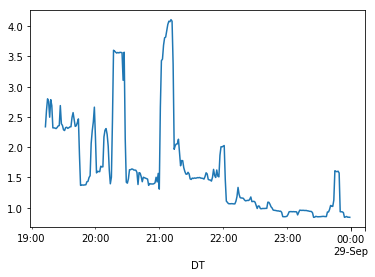

In [8]:
data['2010-09-28']['Global_active_power'].plot()

In [9]:
data['2010-09-28']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DT,,,,,,,
2010-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Filling these missing values with interpolate method:
#let's make a copy of the dataset
data2 = data.copy()
data2 = data2.interpolate(method = 'linear')

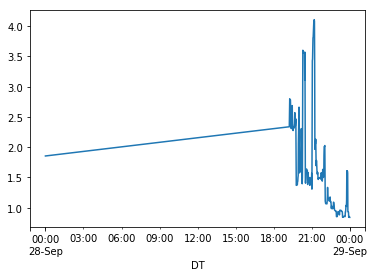

In [11]:
data2['2010-09-28']['Global_active_power'].plot()

Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


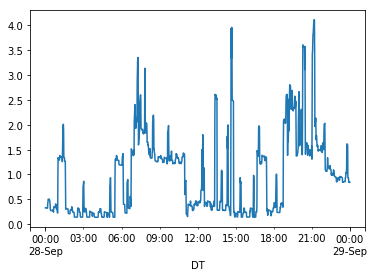

In [12]:
data3 = data.copy()
#Interpolating is clearly not a good idea, so replacing all null values with values from previous day
#Given that "observations of power consumption within the household were collected every minute", 
#previous day same time can be calculated by 24*60 rows ahead

previous_day = 24*60
for row in range(data3.values.shape[0]):
    for col in range(data3.values.shape[1]):
        if np.isnan(data3.values[row, col]):
            data3.values[row, col] = data3.values[row - previous_day, col]

#let's check if there are anymore missing values:
print(data3[data3.isnull().any(axis=1)])
            
data3['2010-09-28']['Global_active_power'].plot()            

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


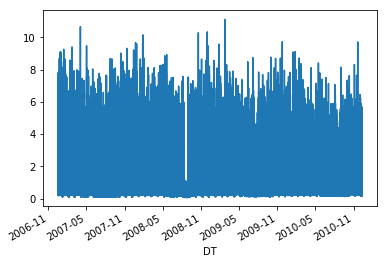

In [14]:
data3['Global_active_power'].plot()

In [86]:
#Too many rows, let's resample the dataset to reflect monthly consumption:
data_monthly = data3[['Global_active_power']].resample('M').sum()
data_monthly.head()

,Global_active_power
DT,
2006-12-31,41826.752
2007-01-31,63804.022
2007-02-28,46567.906
2007-03-31,55279.844
2007-04-30,41240.016


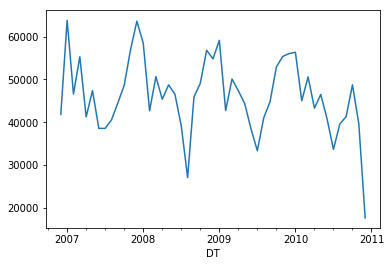

In [87]:
data_monthly['Global_active_power'].plot()

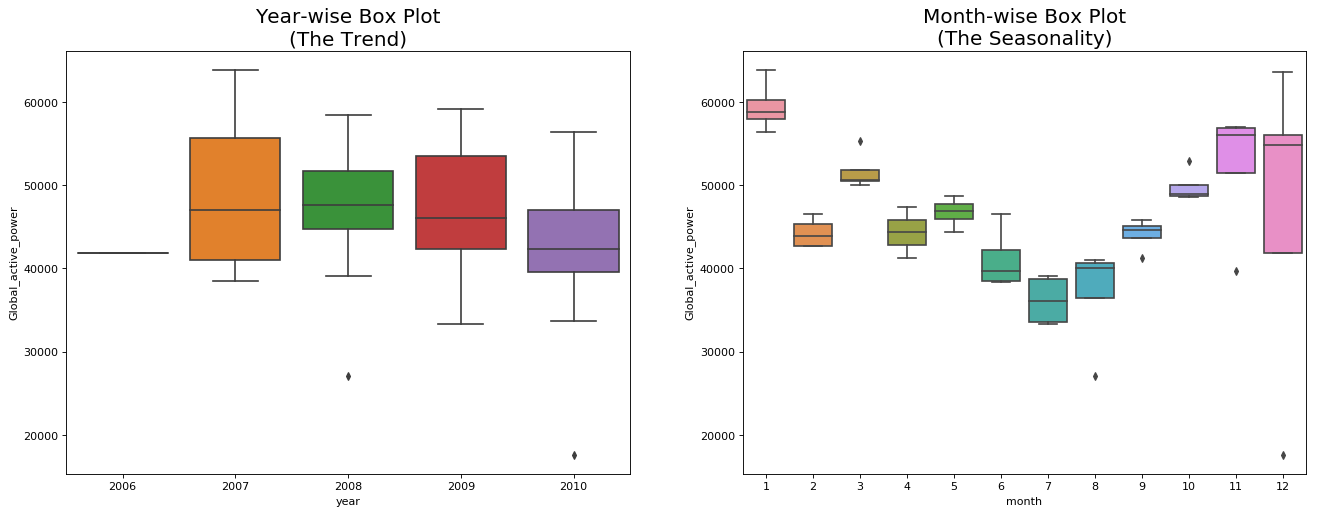

In [88]:
#Data Exploration through visualization:
data_monthly['year'] = data_monthly.index.year
data_monthly['month'] = data_monthly.index.month
years = data_monthly['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Global_active_power', data=data_monthly, ax=axes[0])
sns.boxplot(x='month', y='Global_active_power', data=data_monthly)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [100]:
data_heatmap = data_monthly[1:].pivot("month", "year", "Global_active_power")
data_heatmap.reset_index(inplace = True)
data_heatmap['month'] = data_heatmap['month'].astype(int).apply(lambda x: calendar.month_name[x])
data_heatmap.set_index('month', inplace=True)
data_heatmap

year,2007,2008,2009,2010
month,,,,
January,63804.022,58471.696,59109.734,56323.442
February,46567.906,42666.826,42729.468,45003.018
March,55279.844,50633.656,50068.594,50575.750
April,41240.016,45366.484,47344.436,43277.302
May,47374.472,48711.394,44368.566,46482.698
June,38548.726,46535.532,38405.656,40729.322
July,38550.504,39118.128,33337.404,33650.942
August,40544.516,27063.304,41002.130,39560.726
September,44513.148,45862.270,44788.658,41311.970


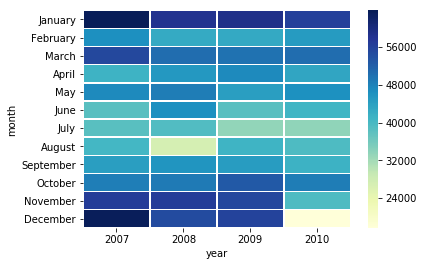

In [101]:
sns.heatmap(data_heatmap, linewidths=.5, cmap="YlGnBu")

In [122]:
data_monthly.head()

,Global_active_power,year,month
DT,,,
2006-12-31,41826.752,2006,12
2007-01-31,63804.022,2007,1
2007-02-28,46567.906,2007,2
2007-03-31,55279.844,2007,3
2007-04-30,41240.016,2007,4


C:\Users\50502\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


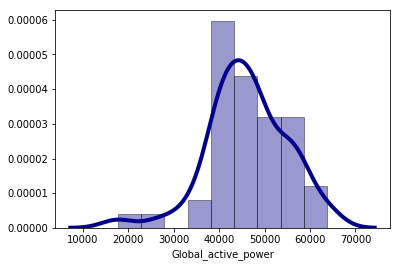

In [130]:
sns.distplot(data_monthly['Global_active_power'], hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4} )

Text(0,0.5,'Density')

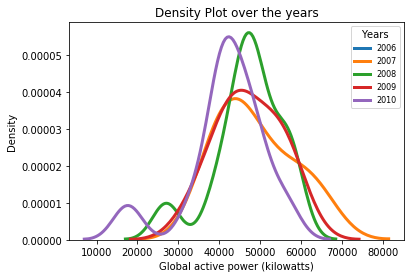

In [132]:
for year in years:
    sns.distplot(data_monthly['Global_active_power'][data_monthly['year']==year], hist=False, kde=True, 
                kde_kws = {'linewidth': 3}, label = year)
    
plt.legend(prop={'size': 8}, title = 'Years')
plt.title('Density Plot over the years')
plt.xlabel('Global active power (kilowatts)')
plt.ylabel('Density')

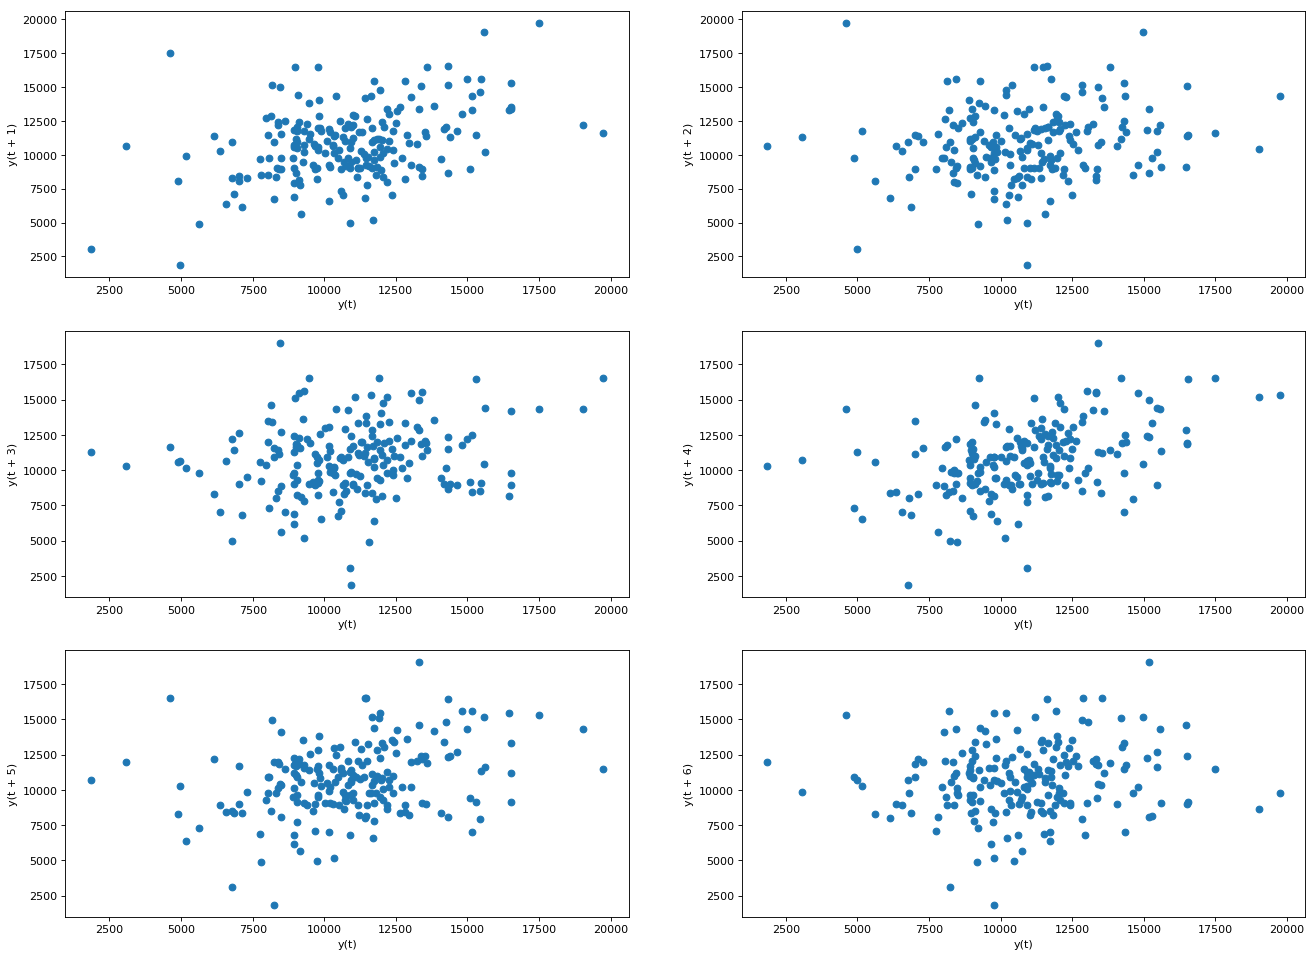

In [166]:
data_weekly = data3[['Global_active_power']].resample('W').sum()
fig, axes = plt.subplots(3, 2, figsize=(20,15), dpi= 80)
lag=1
for i in range(3):
    for j in range(2):
        lag_plot(data_weekly['Global_active_power'], lag=lag, ax=axes[i][j])
        lag+=1
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20,15), dpi= 80)
lag=1
for i in range(3):
    for j in range(2):
        lag_plot(data3['Global_active_power'], lag=lag, ax=axes[i][j])
        lag+=1
plt.show()

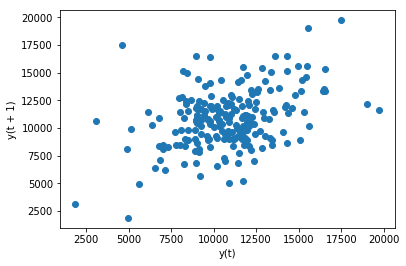

In [153]:
lag_plot(data_weekly['Global_active_power'], lag=1)
plt.show()

In [ ]:


plt.show()

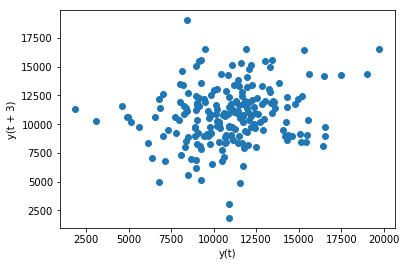

In [137]:
lag_plot(data_weekly['Global_active_power'], lag=3)

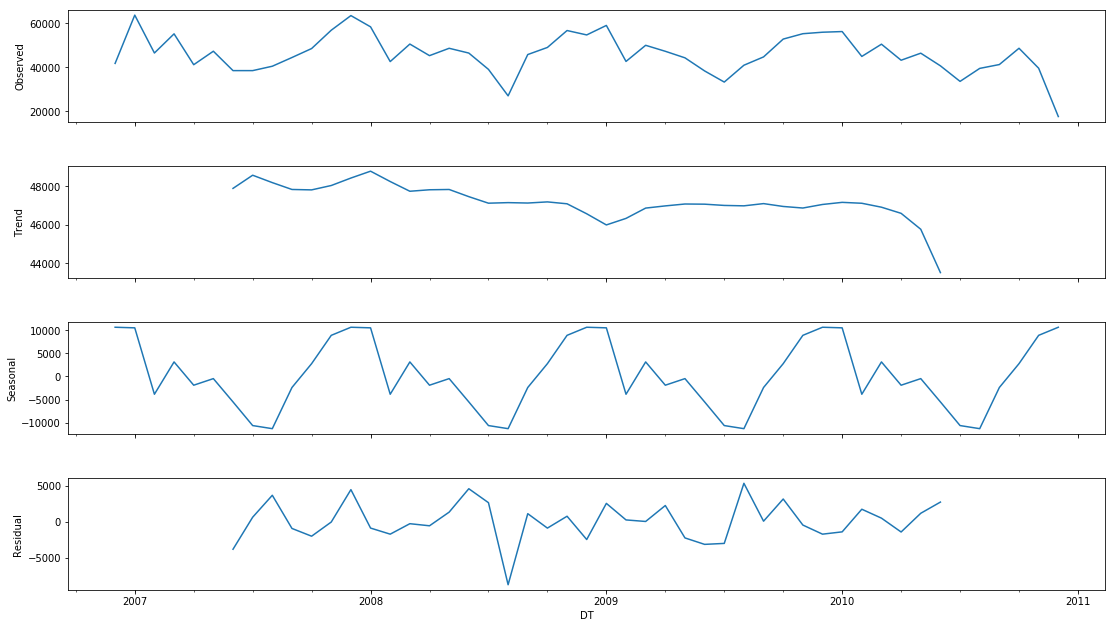

In [19]:
#Let's visualize this time-series data into distinct components: trend, seasonality, and noise:

decomposition = seasonal_decompose(data_monthly[['Global_active_power']], model='additive')
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()